## Update Showcase Chart

In [10]:
import yfinance as yf

from pathlib import Path

from mplchart.chart import Chart

from mplchart.primitives import Candlesticks, Volume, TradeMarker, TradeSpan
from mplchart.indicators import SMA, EMA, RSI, MACD

from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats("svg")

ROOT = Path.cwd().parent

In [11]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-03-18 00:00:00-04:00,44.717365,45.340712,44.714956,45.251663,104879200,0.0,0.0
2019-03-19 00:00:00-04:00,45.331085,45.485116,44.746243,44.893055,126585600,0.0,0.0
2019-03-20 00:00:00-04:00,44.820854,45.605456,44.459842,45.285358,124140800,0.0,0.0
2019-03-21 00:00:00-04:00,45.733017,47.251674,45.682473,46.953236,204136800,0.0,0.0
2019-03-22 00:00:00-04:00,47.013393,47.578980,45.915917,45.980900,169630800,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-11 00:00:00-04:00,172.940002,174.380005,172.050003,172.750000,60139500,0.0,0.0
2024-03-12 00:00:00-04:00,173.149994,174.029999,171.009995,173.229996,59825400,0.0,0.0
2024-03-13 00:00:00-04:00,172.770004,173.190002,170.759995,171.130005,52488700,0.0,0.0


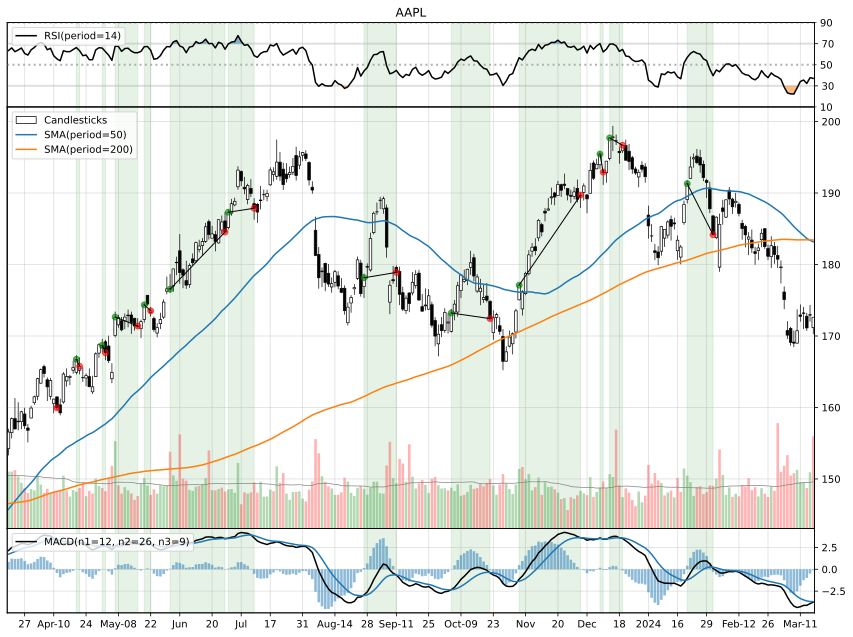

In [12]:
max_bars = 250

indicators = [
    Candlesticks(use_bars=False),
    SMA(50),
    SMA(200),
    Volume(),
    RSI(),
    MACD(),
    TradeMarker(),
    TradeSpan(),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)

In [10]:
showcase = ROOT.joinpath("output/showcase.svg")

data = chart.render("svg")

print(f"Updating {showcase.name} ...")

showcase.write_bytes(data)

Updating showcase.svg ...


301615